In [2]:
import csv, os, pickle
from os.path import join

In [2]:
#Always 1 Syanapse table file in each dir (if any)? yes

data_base="/scratch/PI/euan/projects/mhc/data/tables/v2_data_subset/"
f=open(join(data_base, "cardiovascular-HealthKitDataCollector-v1.tsv"))
tsvin = csv.DictReader(f, delimiter='\t')
for i in range(1000000):
    line = tsvin.next()
    adjunct_file = line['data.csv']
    if adjunct_file == "NA":
        continue
    folder1 = str(int(adjunct_file) % 1000)
    folder2 = adjunct_file
    adjust_base = "/scratch/PI/euan/projects/mhc/data/synapseCache_v2/"
    if len ([x for x in os.listdir(join(adjust_base, folder1, folder2)) if x[-3:]=="csv"]) != 1:
        print line

In [20]:
line

{'ID': '715756_748',
 'appVersion': 'version 2.0.1, build 3',
 'createdOn': '2017-04-24 02:37:53',
 'createdOnTimeZone': '-400',
 'data.csv': '15266918',
 'dataGroups': 'NA',
 'externalId': 'NA',
 'healthCode': '4ef2413e-48ae-41e1-9641-e1b47ab450a1',
 'phoneInfo': 'iPhone 6 Plus',
 'recordId': '31ec39ca-d5d6-4db0-9329-7a28f6cdf2cc',
 'uploadDate': '2017-04-25',
 'userSharingScope': 'ALL_QUALIFIED_RESEARCHERS'}

In [1]:
ls /scratch/PI/euan/projects/mhc/data/tables/v2_data_subset/subjects/healthkit_data/

subject.healthkit_data  x109  x120  x132  x22  x34  x46  x58  x7   x81  x93
x0                      x11   x121  x133  x23  x35  x47  x59  x70  x82  x94
x1                      x110  x122  x134  x24  x36  x48  x6   x71  x83  x95
x10                     x111  x123  x135  x25  x37  x49  x60  x72  x84  x96
x100                    x112  x124  x14   x26  x38  x5   x61  x73  x85  x97
x101                    x113  x125  x15   x27  x39  x50  x62  x74  x86  x98
x102                    x114  x126  x16   x28  x4   x51  x63  x75  x87  x99
x103                    x115  x127  x17   x29  x40  x52  x64  x76  x88
x104                    x116  x128  x18   x3   x41  x53  x65  x77  x89
x105                    x117  x129  x19   x30  x42  x54  x66  x78  x9
x106                    x118  x13   x2    x31  x43  x55  x67  x79  x90
x107                    x119  x130  x20   x32  x44  x56  x68  x8   x91
x108                    x12   x131  x21   x33  x45  x57  x69  x80  x92


In [15]:
#Let's look for step outliers
from table_parser import *
from aggregators import *

#filenames - note args.x becomes x_fn for intervention_metadata_fn
intervention_metadata_fn = "/scratch/PI/euan/projects/mhc/data/tables/v2_data_subset/cardiovascular-ABTestResults-v1.tsv"

intervention_metadata=load_abtest(intervention_metadata_fn)
days_in_study_dict=dict()
intervention_order=dict()
for row in range(len(intervention_metadata)):
    subject=intervention_metadata['healthCode'][row]
    order=intervention_metadata['ABTestResultvariable_value'][row]
    days_in_study=intervention_metadata['ABTestResultdays_in_study'][row]
    days_in_study_dict[subject]=days_in_study
    intervention_order[subject]=order.split(',')

In [27]:
synapseCacheDir = "/scratch/PI/euan/projects/mhc/data/synapseCache_v2/"
tables = "/scratch/PI/euan/projects/mhc/data/tables/v2_data_subset/cardiovascular-HealthKitDataCollector-v1.tsv"
subjects = "/scratch/PI/euan/projects/mhc/data/tables/v2_data_subset/subjects/healthkit_data/x0"
#subjects = "parsed_v2_HealthKitData.0.small"

#create pickle of data

subject_daily_vals=parse_healthkit_data_collector(tables,synapseCacheDir,subjects)
print len(subject_daily_vals)
#that took a while - we should make a chache
pickle.dump(subject_daily_vals,open("cache.p",'wb'))

0/127316
100/127316
200/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #248 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #5 (got 1 columns instead of 7)
    Line #17 (got 1 columns instead of 7)
    Line #32 (got 1 columns instead of 7)
    Line #53 (got 1 columns instead of 7)
    Line #72 (got 1 columns instead of 7)
    Line #94 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


300/127316
400/127316
500/127316
600/127316
700/127316
800/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #53 (got 1 columns instead of 7)
    Line #68 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #78 (got 1 columns instead of 7)
    Line #253 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


900/127316
1000/127316
1100/127316
1200/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #14 (got 1 columns instead of 7)
    Line #18 (got 1 columns instead of 7)
    Line #20 (got 1 columns instead of 7)
    Line #33 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #88 (got 1 columns instead of 7)
    Line #109 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


1300/127316
1400/127316
1500/127316
1600/127316
1700/127316
1800/127316
1900/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #269 (got 1 columns instead of 7)
    Line #274 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #7 (got 1 columns instead of 7)
    Line #11 (got 1 columns instead of 7)
    Line #15 (got 1 columns instead of 7)
    Line #39 (got 1 columns instead of 7)
    Line #52 (got 1 columns instead of 7)
    Line #70 (got 1 columns instead of 7)
    Line #88 (got 1 columns instead of 7)
    Line #93 (got 1 columns instead of 7)
    Line #96 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


2000/127316
2100/127316
2200/127316
2300/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #230 (got 1 columns instead of 7)
    Line #237 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #159 (got 1 columns instead of 7)
    Line #212 (got 1 columns instead of 7)
    Line #226 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


2400/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #186 (got 1 columns instead of 7)
    Line #199 (got 1 columns instead of 7)
    Line #205 (got 1 columns instead of 7)
    Line #243 (got 1 columns instead of 7)
    Line #285 (got 1 columns instead of 7)
    Line #291 (got 1 columns instead of 7)
    Line #297 (got 1 columns instead of 7)
    Line #300 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #12 (got 1 columns instead of 7)
    Line #50 (got 1 columns instead of 7)
    Line #139 (got 1 columns instead of 7)
    Line #262 (got 1 columns instead of 7)
    Line #295 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: S

2500/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #12 (got 1 columns instead of 7)
    Line #23 (got 1 columns instead of 7)
    Line #65 (got 1 columns instead of 7)
    Line #71 (got 1 columns instead of 7)
    Line #175 (got 1 columns instead of 7)
    Line #187 (got 1 columns instead of 7)
    Line #191 (got 1 columns instead of 7)
    Line #235 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #12 (got 1 columns instead of 7)
    Line #49 (got 1 columns instead of 7)
    Line #60 (got 1 columns instead of 7)
    Line #63 (got 1 columns instead of 7)
    Line #86 (got 1 columns instead of 7)
    Line #104 (got 1 columns instead of 7)
    Line #121 (got 1 columns instead of 7)
    Line #147 (got 1 columns instead of 7)
    Line #194 (got 1 c

2600/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #57 (got 1 columns instead of 7)
    Line #120 (got 1 columns instead of 7)
    Line #245 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #6 (got 1 columns instead of 7)
    Line #110 (got 1 columns instead of 7)
    Line #116 (got 1 columns instead of 7)
    Line #163 (got 1 columns instead of 7)
    Line #188 (got 1 columns instead of 7)
    Line #232 (got 1 columns instead of 7)
    Line #261 (got 1 columns instead of 7)
    Line #263 (got 1 columns instead of 7)
    Line #265 (got 1 columns instead of 7)
    Line #269 (got 1 columns instead of 7)
    Line #277 (got 1 columns instead of 7)
    Line #279 (got 1 columns instead of 7)
    Line #282 (got 1 columns instead of 7)
    Line #286 (g

2700/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #17 (got 1 columns instead of 7)
    Line #27 (got 1 columns instead of 7)
    Line #40 (got 1 columns instead of 7)
    Line #42 (got 1 columns instead of 7)
    Line #45 (got 1 columns instead of 7)
    Line #50 (got 1 columns instead of 7)
    Line #227 (got 1 columns instead of 7)
    Line #244 (got 1 columns instead of 7)
    Line #250 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #10 (got 1 columns instead of 7)
    Line #60 (got 1 columns instead of 7)
    Line #83 (got 1 columns instead of 7)
    Line #99 (got 1 columns instead of 7)
    Line #160 (got 1 columns instead of 7)
    Line #170 (got 1 columns instead of 7)
    Line #190 (got 1 columns instead of 7)
    Line #193 (got 1 co

2800/127316
2900/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #6 (got 1 columns instead of 7)
    Line #23 (got 1 columns instead of 7)
    Line #29 (got 1 columns instead of 7)
    Line #104 (got 1 columns instead of 7)
    Line #108 (got 1 columns instead of 7)
    Line #129 (got 1 columns instead of 7)
    Line #264 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #27 (got 1 columns instead of 7)
    Line #33 (got 1 columns instead of 7)
    Line #36 (got 1 columns instead of 7)
    Line #47 (got 1 columns instead of 7)
    Line #159 (got 1 columns instead of 7)
    Line #186 (got 1 columns instead of 7)
    Line #190 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/li

3000/127316
3100/127316
3200/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #104 (got 1 columns instead of 7)
    Line #111 (got 1 columns instead of 7)
    Line #285 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #105 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


3300/127316
3400/127316
3500/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #80 (got 1 columns instead of 7)
    Line #84 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #13 (got 1 columns instead of 7)
    Line #26 (got 1 columns instead of 7)
    Line #46 (got 1 columns instead of 7)
    Line #261 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #24 (got 1 columns instead of 7)
    Line #26 (got 1 columns instead of 7)
    Line #28 (got 1 columns instead of 7)
    Line #94 (got 1 columns instead of 7)
    Line #100 (got 1 columns instead of 7)
    Line #122 (got 1 columns instead of 7)
    Line #125 (got 1 co

3600/127316
3700/127316
3800/127316
3900/127316
4000/127316
4100/127316
4200/127316
4300/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #63 (got 1 columns instead of 7)
    Line #122 (got 1 columns instead of 7)
    Line #267 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #82 (got 1 columns instead of 7)
    Line #92 (got 1 columns instead of 7)
    Line #99 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


4400/127316
4500/127316
4600/127316
4700/127316
4800/127316
4900/127316
5000/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #19 (got 1 columns instead of 7)
    Line #38 (got 1 columns instead of 7)
    Line #282 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #61 (got 1 columns instead of 7)
    Line #76 (got 1 columns instead of 7)
    Line #190 (got 1 columns instead of 7)
    Line #192 (got 1 columns instead of 7)
    Line #195 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #31 (got 1 columns instead of 7)
    Line #198 (got 1 columns instead of 7)
    Line #205 (got 1 columns instead of 7)
    Line #207 (got 1 columns instead of 7)
    Line #209 (got 

5100/127316
5200/127316
5300/127316
5400/127316
5500/127316
5600/127316
5700/127316
5800/127316
5900/127316
6000/127316
6100/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #71 (got 1 columns instead of 7)
    Line #92 (got 1 columns instead of 7)
    Line #109 (got 1 columns instead of 7)
    Line #125 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #94 (got 1 columns instead of 7)
    Line #107 (got 1 columns instead of 7)
    Line #120 (got 1 columns instead of 7)
    Line #131 (got 1 columns instead of 7)
    Line #133 (got 1 columns instead of 7)
    Line #135 (got 1 columns instead of 7)
    Line #139 (got 1 columns instead of 7)
    Line #143 (got 1 columns instead of 7)
    Line #146 (got 1 columns instead of 7)
    Line #148 (got 1 columns instead of 7)
    Line #150 (got 1 columns instead of 7)
    Line #152 (got 1 columns instead of 7)
    Line #154 (g

6200/127316
6300/127316
6400/127316
6500/127316
6600/127316
6700/127316
6800/127316
6900/127316
7000/127316
7100/127316
7200/127316
7300/127316
7400/127316
7500/127316
7600/127316
7700/127316
7800/127316
7900/127316
8000/127316
8100/127316
8200/127316
8300/127316
8400/127316
8500/127316
8600/127316
8700/127316
8800/127316
8900/127316
9000/127316
9100/127316
9200/127316
9300/127316
9400/127316
9500/127316
9600/127316
9700/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #116 (got 1 columns instead of 7)
    Line #193 (got 1 columns instead of 7)
    Line #274 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #41 (got 1 columns instead of 7)
    Line #61 (got 1 columns instead of 7)
    Line #65 (got 1 columns instead of 7)
    Line #75 (got 1 columns instead of 7)
    Line #105 (got 1 columns instead of 7)
    Line #118 (got 1 columns instead of 7)
    Line #120 (got 1 columns instead of 7)
    Line #128 (got 1 columns instead of 7)
    Line #134 (got 1 columns instead of 7)
    Line #136 (got 1 columns instead of 7)
    Line #139 (got 1 columns instead of 7)
    Line #141 (got 1 columns instead of 7)
    Line #143 (got 1 columns instead of 7)
    Line #147 (go

9800/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #9 (got 1 columns instead of 7)
    Line #12 (got 1 columns instead of 7)
    Line #29 (got 1 columns instead of 7)
    Line #42 (got 1 columns instead of 7)
    Line #52 (got 1 columns instead of 7)
    Line #56 (got 1 columns instead of 7)
    Line #59 (got 1 columns instead of 7)
    Line #62 (got 1 columns instead of 7)
    Line #70 (got 1 columns instead of 7)
    Line #234 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #69 (got 1 columns instead of 7)
    Line #73 (got 1 columns instead of 7)
    Line #177 (got 1 columns instead of 7)
    Line #232 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


9900/127316
10000/127316
10100/127316
10200/127316
10300/127316
10400/127316
10500/127316
10600/127316
10700/127316
10800/127316
10900/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #150 (got 1 columns instead of 7)
    Line #154 (got 1 columns instead of 7)
    Line #237 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #57 (got 1 columns instead of 7)
    Line #59 (got 1 columns instead of 7)
    Line #88 (got 1 columns instead of 7)
    Line #186 (got 1 columns instead of 7)
    Line #213 (got 1 columns instead of 7)
    Line #217 (got 1 columns instead of 7)
    Line #219 (got 1 columns instead of 7)
    Line #221 (got 1 columns instead of 7)
    Line #223 (got 1 columns instead of 7)
    Line #226 (got 1 columns instead of 7)
    Line #228 (got 1 columns instead of 7)
    Line #235 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


11000/127316
11100/127316
11200/127316
11300/127316
11400/127316
11500/127316
11600/127316
11700/127316
11800/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #151 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #114 (got 1 columns instead of 7)
    Line #143 (got 1 columns instead of 7)
    Line #151 (got 1 columns instead of 7)
    Line #253 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


11900/127316
12000/127316
12100/127316
12200/127316
12300/127316
12400/127316
12500/127316
12600/127316
12700/127316
12800/127316
12900/127316
13000/127316
13100/127316
13200/127316
13300/127316
13400/127316
13500/127316
13600/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #86 (got 1 columns instead of 7)
    Line #90 (got 1 columns instead of 7)
    Line #95 (got 1 columns instead of 7)
    Line #100 (got 1 columns instead of 7)
    Line #104 (got 1 columns instead of 7)
    Line #117 (got 1 columns instead of 7)
    Line #119 (got 1 columns instead of 7)
    Line #125 (got 1 columns instead of 7)
    Line #201 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #139 (got 1 columns instead of 7)
    Line #141 (got 1 columns instead of 7)
    Line #215 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


13700/127316
13800/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #14 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #25 (got 1 columns instead of 7)
    Line #30 (got 1 columns instead of 7)
    Line #34 (got 1 columns instead of 7)
    Line #37 (got 1 columns instead of 7)
    Line #39 (got 1 columns instead of 7)
    Line #43 (got 1 columns instead of 7)
    Line #45 (got 1 columns instead of 7)
    Line #61 (got 1 columns instead of 7)
    Line #63 (got 1 columns instead of 7)
    Line #245 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


13900/127316
14000/127316
14100/127316
14200/127316
14300/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #46 (got 1 columns instead of 7)
    Line #49 (got 1 columns instead of 7)
    Line #66 (got 1 columns instead of 7)
    Line #80 (got 1 columns instead of 7)
    Line #82 (got 1 columns instead of 7)
    Line #87 (got 1 columns instead of 7)
    Line #91 (got 1 columns instead of 7)
    Line #96 (got 1 columns instead of 7)
    Line #98 (got 1 columns instead of 7)
    Line #156 (got 1 columns instead of 7)
    Line #167 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #146 (got 1 columns instead of 7)
    Line #170 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


14400/127316
14500/127316
14600/127316
14700/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #138 (got 1 columns instead of 7)
    Line #142 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #231 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


14800/127316
14900/127316
15000/127316
15100/127316
15200/127316
15300/127316
15400/127316
15500/127316
15600/127316
15700/127316
15800/127316
15900/127316
16000/127316
16100/127316
16200/127316
16300/127316
16400/127316
16500/127316
16600/127316
16700/127316
16800/127316
16900/127316
17000/127316
17100/127316
17200/127316
17300/127316
17400/127316
17500/127316
17600/127316
17700/127316
17800/127316
17900/127316
18000/127316
18100/127316
18200/127316
18300/127316
18400/127316
18500/127316
18600/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #18 (got 1 columns instead of 7)
    Line #179 (got 1 columns instead of 7)
    Line #185 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


18700/127316
18800/127316
18900/127316
19000/127316
19100/127316
19200/127316
19300/127316
19400/127316
19500/127316
19600/127316
19700/127316
19800/127316
19900/127316
20000/127316
20100/127316
20200/127316
20300/127316
20400/127316
20500/127316
20600/127316
20700/127316
20800/127316
20900/127316
21000/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #13 (got 1 columns instead of 7)
    Line #25 (got 1 columns instead of 7)
    Line #42 (got 1 columns instead of 7)
    Line #46 (got 1 columns instead of 7)
    Line #77 (got 1 columns instead of 7)
    Line #80 (got 1 columns instead of 7)
    Line #82 (got 1 columns instead of 7)
    Line #88 (got 1 columns instead of 7)
    Line #92 (got 1 columns instead of 7)
    Line #105 (got 1 columns instead of 7)
    Line #107 (got 1 columns instead of 7)
    Line #109 (got 1 columns instead of 7)
    Line #112 (got 1 columns instead of 7)
    Line #118 (got 1 columns instead of 7)
    Line #122 (got 1 columns instead of 7)
    Line #129 (got 1 columns instead of 7)
    Line #138 (got 1 columns instead of 7)
    Line #141 (got 1 columns instead of 7)
    Line #144 (got 1 columns instead of 7)
    Line #157 (got 1 columns instead of 7)
  warnings.warn(errms

21100/127316
21200/127316
21300/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #38 (got 1 columns instead of 7)
    Line #115 (got 1 columns instead of 7)
    Line #133 (got 1 columns instead of 7)
    Line #218 (got 1 columns instead of 7)
    Line #239 (got 1 columns instead of 7)
    Line #271 (got 1 columns instead of 7)
    Line #283 (got 1 columns instead of 7)
    Line #286 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #31 (got 1 columns instead of 7)
    Line #67 (got 1 columns instead of 7)
    Line #129 (got 1 columns instead of 7)
    Line #177 (got 1 columns instead of 7)
    Line #220 (got 1 columns instead of 7)
    Line #268 (got 1 columns instead of 7)
    Line #270 (got 1 columns instead of 7)
    Line #300 (got 1 columns instead of 7)
    Line #305 (g

21400/127316
21500/127316
21600/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #15 (got 1 columns instead of 7)
    Line #67 (got 1 columns instead of 7)
    Line #74 (got 1 columns instead of 7)
    Line #107 (got 1 columns instead of 7)
    Line #122 (got 1 columns instead of 7)
    Line #212 (got 1 columns instead of 7)
    Line #215 (got 1 columns instead of 7)
    Line #221 (got 1 columns instead of 7)
    Line #294 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #19 (got 1 columns instead of 7)
    Line #31 (got 1 columns instead of 7)
    Line #47 (got 1 columns instead of 7)
    Line #64 (got 1 columns instead of 7)
    Line #67 (got 1 columns instead of 7)
    Line #129 (got 1 columns instead of 7)
    Line #140 (got 1 columns instead of 7)
    Line #145 (got 1 

21700/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #22 (got 1 columns instead of 7)
    Line #188 (got 1 columns instead of 7)
    Line #191 (got 1 columns instead of 7)
    Line #193 (got 1 columns instead of 7)
    Line #218 (got 1 columns instead of 7)
    Line #232 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


21800/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #6 (got 1 columns instead of 7)
    Line #16 (got 1 columns instead of 7)
    Line #29 (got 1 columns instead of 7)
    Line #48 (got 1 columns instead of 7)
    Line #60 (got 1 columns instead of 7)
    Line #98 (got 1 columns instead of 7)
    Line #125 (got 1 columns instead of 7)
    Line #141 (got 1 columns instead of 7)
    Line #154 (got 1 columns instead of 7)
    Line #276 (got 1 columns instead of 7)
    Line #279 (got 1 columns instead of 7)
    Line #289 (got 1 columns instead of 7)
    Line #341 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


21900/127316
22000/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #17 (got 1 columns instead of 7)
    Line #100 (got 1 columns instead of 7)
    Line #112 (got 1 columns instead of 7)
    Line #116 (got 1 columns instead of 7)
    Line #129 (got 1 columns instead of 7)
    Line #140 (got 1 columns instead of 7)
    Line #143 (got 1 columns instead of 7)
    Line #154 (got 1 columns instead of 7)
    Line #166 (got 1 columns instead of 7)
    Line #173 (got 1 columns instead of 7)
    Line #190 (got 1 columns instead of 7)
    Line #200 (got 1 columns instead of 7)
    Line #235 (got 1 columns instead of 7)
    Line #257 (got 1 columns instead of 7)
    Line #262 (got 1 columns instead of 7)
    Line #266 (got 1 columns instead of 7)
    Line #268 (got 1 columns instead of 7)
    Line #309 (got 1 columns instead of 7)
    Line #324 (got 1 columns instead of 7)
    Line #339 (got 1 columns instead of 7)
    Line #344

22100/127316
22200/127316
22300/127316
22400/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #42 (got 1 columns instead of 7)
    Line #74 (got 1 columns instead of 7)
    Line #90 (got 1 columns instead of 7)
    Line #106 (got 1 columns instead of 7)
    Line #138 (got 1 columns instead of 7)
    Line #147 (got 1 columns instead of 7)
    Line #156 (got 1 columns instead of 7)
    Line #162 (got 1 columns instead of 7)
    Line #170 (got 1 columns instead of 7)
    Line #186 (got 1 columns instead of 7)
    Line #197 (got 1 columns instead of 7)
    Line #214 (got 1 columns instead of 7)
    Line #268 (got 1 columns instead of 7)
    Line #299 (got 1 columns instead of 7)
    Line #313 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


22500/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #24 (got 1 columns instead of 7)
    Line #37 (got 1 columns instead of 7)
    Line #62 (got 1 columns instead of 7)
    Line #66 (got 1 columns instead of 7)
    Line #149 (got 1 columns instead of 7)
    Line #183 (got 1 columns instead of 7)
    Line #188 (got 1 columns instead of 7)
    Line #196 (got 1 columns instead of 7)
    Line #245 (got 1 columns instead of 7)
    Line #294 (got 1 columns instead of 7)
    Line #363 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


22600/127316
22700/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #192 (got 1 columns instead of 7)
    Line #242 (got 1 columns instead of 7)
    Line #261 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


22800/127316
22900/127316
23000/127316
23100/127316
23200/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #9 (got 1 columns instead of 7)
    Line #30 (got 1 columns instead of 7)
    Line #58 (got 1 columns instead of 7)
    Line #87 (got 1 columns instead of 7)
    Line #96 (got 1 columns instead of 7)
    Line #164 (got 1 columns instead of 7)
    Line #167 (got 1 columns instead of 7)
    Line #176 (got 1 columns instead of 7)
    Line #220 (got 1 columns instead of 7)
    Line #265 (got 1 columns instead of 7)
    Line #338 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #13 (got 1 columns instead of 7)
    Line #121 (got 1 columns instead of 7)
    Line #149 (got 1 columns instead of 7)
    Line #154 (got 1 columns instead of 7)
    Line #197 (got 1 columns instead of 7)
    Line #201 (got 1

23300/127316
23400/127316
23500/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #4 (got 1 columns instead of 7)
    Line #8 (got 1 columns instead of 7)
    Line #10 (got 1 columns instead of 7)
    Line #17 (got 1 columns instead of 7)
    Line #26 (got 1 columns instead of 7)
    Line #113 (got 1 columns instead of 7)
    Line #144 (got 1 columns instead of 7)
    Line #158 (got 1 columns instead of 7)
    Line #167 (got 1 columns instead of 7)
    Line #185 (got 1 columns instead of 7)
    Line #205 (got 1 columns instead of 7)
    Line #223 (got 1 columns instead of 7)
    Line #243 (got 1 columns instead of 7)
    Line #256 (got 1 columns instead of 7)
    Line #271 (got 1 columns instead of 7)
    Line #284 (got 1 columns instead of 7)
    Line #291 (got 1 columns instead of 7)
    Line #307 (got 1 columns instead of 7)
    Line #321 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


23600/127316
23700/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #62 (got 1 columns instead of 7)
    Line #136 (got 1 columns instead of 7)
    Line #147 (got 1 columns instead of 7)
    Line #158 (got 1 columns instead of 7)
    Line #174 (got 1 columns instead of 7)
    Line #201 (got 1 columns instead of 7)
    Line #213 (got 1 columns instead of 7)
    Line #222 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


23800/127316
23900/127316
24000/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #6 (got 1 columns instead of 7)
    Line #18 (got 1 columns instead of 7)
    Line #22 (got 1 columns instead of 7)
    Line #33 (got 1 columns instead of 7)
    Line #39 (got 1 columns instead of 7)
    Line #48 (got 1 columns instead of 7)
    Line #95 (got 1 columns instead of 7)
    Line #102 (got 1 columns instead of 7)
    Line #118 (got 1 columns instead of 7)
    Line #124 (got 1 columns instead of 7)
    Line #138 (got 1 columns instead of 7)
    Line #179 (got 1 columns instead of 7)
    Line #282 (got 1 columns instead of 7)
    Line #330 (got 1 columns instead of 7)
    Line #332 (got 1 columns instead of 7)
    Line #334 (got 1 columns instead of 7)
    Line #357 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


24100/127316
24200/127316
24300/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #44 (got 1 columns instead of 7)
    Line #48 (got 1 columns instead of 7)
    Line #112 (got 1 columns instead of 7)
    Line #115 (got 1 columns instead of 7)
    Line #161 (got 1 columns instead of 7)
    Line #171 (got 1 columns instead of 7)
    Line #193 (got 1 columns instead of 7)
    Line #251 (got 1 columns instead of 7)
    Line #270 (got 1 columns instead of 7)
    Line #286 (got 1 columns instead of 7)
    Line #306 (got 1 columns instead of 7)
    Line #339 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


24400/127316
24500/127316
24600/127316
24700/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #121 (got 1 columns instead of 7)
    Line #148 (got 1 columns instead of 7)
    Line #175 (got 1 columns instead of 7)
    Line #179 (got 1 columns instead of 7)
    Line #196 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


24800/127316
24900/127316
25000/127316
25100/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #7 (got 1 columns instead of 7)
    Line #28 (got 1 columns instead of 7)
    Line #32 (got 1 columns instead of 7)
    Line #40 (got 1 columns instead of 7)
    Line #63 (got 1 columns instead of 7)
    Line #84 (got 1 columns instead of 7)
    Line #114 (got 1 columns instead of 7)
    Line #118 (got 1 columns instead of 7)
    Line #130 (got 1 columns instead of 7)
    Line #133 (got 1 columns instead of 7)
    Line #140 (got 1 columns instead of 7)
    Line #182 (got 1 columns instead of 7)
    Line #193 (got 1 columns instead of 7)
    Line #201 (got 1 columns instead of 7)
    Line #209 (got 1 columns instead of 7)
    Line #215 (got 1 columns instead of 7)
    Line #221 (got 1 columns instead of 7)
    Line #231 (got 1 columns instead of 7)
    Line #247 (got 1 columns instead of 7)
    Line #255 (got 1 columns instead of 7)
    Line #261 (got 

25200/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #138 (got 1 columns instead of 7)
    Line #149 (got 1 columns instead of 7)
    Line #151 (got 1 columns instead of 7)
    Line #154 (got 1 columns instead of 7)
    Line #162 (got 1 columns instead of 7)
    Line #286 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


25300/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #139 (got 1 columns instead of 7)
    Line #142 (got 1 columns instead of 7)
    Line #177 (got 1 columns instead of 7)
    Line #236 (got 1 columns instead of 7)
    Line #249 (got 1 columns instead of 7)
    Line #252 (got 1 columns instead of 7)
    Line #295 (got 1 columns instead of 7)
    Line #348 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


25400/127316
25500/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #58 (got 1 columns instead of 7)
    Line #89 (got 1 columns instead of 7)
    Line #108 (got 1 columns instead of 7)
    Line #166 (got 1 columns instead of 7)
    Line #278 (got 1 columns instead of 7)
    Line #319 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


25600/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #29 (got 1 columns instead of 7)
    Line #72 (got 1 columns instead of 7)
    Line #78 (got 1 columns instead of 7)
    Line #94 (got 1 columns instead of 7)
    Line #122 (got 1 columns instead of 7)
    Line #136 (got 1 columns instead of 7)
    Line #141 (got 1 columns instead of 7)
    Line #169 (got 1 columns instead of 7)
    Line #181 (got 1 columns instead of 7)
    Line #211 (got 1 columns instead of 7)
    Line #214 (got 1 columns instead of 7)
    Line #219 (got 1 columns instead of 7)
    Line #226 (got 1 columns instead of 7)
    Line #231 (got 1 columns instead of 7)
    Line #250 (got 1 columns instead of 7)
    Line #263 (got 1 columns instead of 7)
    Line #292 (got 1 columns instead of 7)
    Line #298 (got 1 columns instead of 7)
    Line #307 (got 1 columns instead of 7)
    Line #314 (got 1 columns instead of 7)
    Line #317 (g

25700/127316
25800/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #102 (got 1 columns instead of 7)
    Line #129 (got 1 columns instead of 7)
    Line #151 (got 1 columns instead of 7)
    Line #155 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


25900/127316
26000/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #13 (got 1 columns instead of 7)
    Line #16 (got 1 columns instead of 7)
    Line #41 (got 1 columns instead of 7)
    Line #48 (got 1 columns instead of 7)
    Line #51 (got 1 columns instead of 7)
    Line #56 (got 1 columns instead of 7)
    Line #81 (got 1 columns instead of 7)
    Line #95 (got 1 columns instead of 7)
    Line #102 (got 1 columns instead of 7)
    Line #124 (got 1 columns instead of 7)
    Line #131 (got 1 columns instead of 7)
    Line #135 (got 1 columns instead of 7)
    Line #139 (got 1 columns instead of 7)
    Line #150 (got 1 columns instead of 7)
    Line #154 (got 1 columns instead of 7)
    Line #166 (got 1 columns instead of 7)
    Line #171 (got 1 columns instead of 7)
    Line #173 (got 1 columns instead of 7)
    Line #206 (got 1 columns instead of 7)
    Line #220 (got 1 columns instead of 7)
    Line #270 (got 1

26100/127316
26200/127316
26300/127316
26400/127316
26500/127316
26600/127316
26700/127316
26800/127316
26900/127316
27000/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #56 (got 1 columns instead of 7)
    Line #63 (got 1 columns instead of 7)
    Line #226 (got 1 columns instead of 7)
    Line #228 (got 1 columns instead of 7)
    Line #242 (got 1 columns instead of 7)
    Line #247 (got 1 columns instead of 7)
    Line #249 (got 1 columns instead of 7)
    Line #264 (got 1 columns instead of 7)
    Line #266 (got 1 columns instead of 7)
    Line #273 (got 1 columns instead of 7)
    Line #279 (got 1 columns instead of 7)
    Line #281 (got 1 columns instead of 7)
    Line #284 (got 1 columns instead of 7)
    Line #288 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


27100/127316
27200/127316
27300/127316
27400/127316
27500/127316
27600/127316
27700/127316
27800/127316
27900/127316
28000/127316
28100/127316
28200/127316
28300/127316
28400/127316
28500/127316
28600/127316
28700/127316
28800/127316
28900/127316
29000/127316
29100/127316
29200/127316
29300/127316
29400/127316
29500/127316
29600/127316
29700/127316
29800/127316
29900/127316
30000/127316
30100/127316
30200/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #248 (got 1 columns instead of 7)
    Line #251 (got 1 columns instead of 7)
    Line #259 (got 1 columns instead of 7)
    Line #261 (got 1 columns instead of 7)
    Line #263 (got 1 columns instead of 7)
    Line #268 (got 1 columns instead of 7)
    Line #271 (got 1 columns instead of 7)
    Line #274 (got 1 columns instead of 7)
    Line #278 (got 1 columns instead of 7)
    Line #280 (got 1 columns instead of 7)
    Line #293 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #14 (got 1 columns instead of 7)
    Line #16 (got 1 columns instead of 7)
    Line #21 (got 1 columns instead of 7)
    Line #65 (got 1 columns instead of 7)
    Line #71 (got 1 columns instead of 7)
    Line #73 (got 

30300/127316
30400/127316
30500/127316
30600/127316
30700/127316
30800/127316
30900/127316
31000/127316
31100/127316
31200/127316
31300/127316
31400/127316
31500/127316
31600/127316
31700/127316
31800/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #57 (got 1 columns instead of 7)
    Line #67 (got 1 columns instead of 7)
    Line #84 (got 1 columns instead of 7)
    Line #99 (got 1 columns instead of 7)
    Line #105 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #26 (got 1 columns instead of 7)
    Line #51 (got 1 columns instead of 7)
    Line #54 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


31900/127316
32000/127316
32100/127316
32200/127316
32300/127316
32400/127316
32500/127316
32600/127316
32700/127316
32800/127316
32900/127316
33000/127316
33100/127316
33200/127316
33300/127316
33400/127316
33500/127316
33600/127316
33700/127316
33800/127316
33900/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #130 (got 1 columns instead of 7)
    Line #200 (got 1 columns instead of 7)
    Line #205 (got 1 columns instead of 7)
    Line #260 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #40 (got 1 columns instead of 7)
    Line #48 (got 1 columns instead of 7)
    Line #72 (got 1 columns instead of 7)
    Line #106 (got 1 columns instead of 7)
    Line #168 (got 1 columns instead of 7)
    Line #201 (got 1 columns instead of 7)
    Line #228 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


34000/127316
34100/127316
34200/127316
34300/127316
34400/127316
34500/127316
34600/127316
34700/127316
34800/127316
34900/127316
35000/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #23 (got 1 columns instead of 7)
    Line #31 (got 1 columns instead of 7)
    Line #96 (got 1 columns instead of 7)
    Line #233 (got 1 columns instead of 7)
    Line #241 (got 1 columns instead of 7)
    Line #251 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


35100/127316
35200/127316
35300/127316
35400/127316
35500/127316
35600/127316
35700/127316
35800/127316
35900/127316
36000/127316
36100/127316
36200/127316
36300/127316
36400/127316
36500/127316
36600/127316
36700/127316
36800/127316
36900/127316
37000/127316
37100/127316
37200/127316
37300/127316
37400/127316
37500/127316
37600/127316
37700/127316
37800/127316
37900/127316
38000/127316
38100/127316
38200/127316
38300/127316
38400/127316
38500/127316
38600/127316
38700/127316
38800/127316
38900/127316
39000/127316
39100/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #7 (got 1 columns instead of 7)
    Line #36 (got 1 columns instead of 7)
    Line #84 (got 1 columns instead of 7)
    Line #92 (got 1 columns instead of 7)
    Line #96 (got 1 columns instead of 7)
    Line #158 (got 1 columns instead of 7)
    Line #210 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #220 (got 1 columns instead of 7)
    Line #222 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


39200/127316
39300/127316
39400/127316
39500/127316
39600/127316
39700/127316
39800/127316
39900/127316
40000/127316
40100/127316
40200/127316
40300/127316
40400/127316
40500/127316
40600/127316
40700/127316
40800/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #67 (got 1 columns instead of 7)
    Line #97 (got 1 columns instead of 7)
    Line #102 (got 1 columns instead of 7)
    Line #111 (got 1 columns instead of 7)
    Line #155 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


40900/127316
41000/127316
41100/127316
41200/127316
41300/127316
41400/127316
41500/127316
41600/127316
41700/127316
41800/127316
41900/127316
42000/127316
42100/127316
42200/127316
42300/127316
42400/127316
42500/127316
42600/127316
42700/127316
42800/127316
42900/127316
43000/127316
43100/127316
43200/127316
43300/127316
43400/127316
43500/127316
43600/127316
43700/127316
43800/127316
43900/127316
44000/127316
44100/127316
44200/127316
44300/127316
44400/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #216 (got 1 columns instead of 7)
    Line #219 (got 1 columns instead of 7)
    Line #221 (got 1 columns instead of 7)
    Line #227 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


44500/127316
44600/127316
44700/127316
44800/127316
44900/127316
45000/127316
45100/127316
45200/127316
45300/127316
45400/127316
45500/127316
45600/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #100 (got 1 columns instead of 7)
    Line #110 (got 1 columns instead of 7)
    Line #114 (got 1 columns instead of 7)
    Line #189 (got 1 columns instead of 7)
    Line #196 (got 1 columns instead of 7)
    Line #212 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #20 (got 1 columns instead of 7)
    Line #49 (got 1 columns instead of 7)
    Line #246 (got 1 columns instead of 7)
    Line #249 (got 1 columns instead of 7)
    Line #255 (got 1 columns instead of 7)
    Line #267 (got 1 columns instead of 7)
    Line #277 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


45700/127316
45800/127316
45900/127316
46000/127316
46100/127316
46200/127316
46300/127316
46400/127316
46500/127316
46600/127316
46700/127316
46800/127316
46900/127316
47000/127316
47100/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #31 (got 1 columns instead of 7)
    Line #38 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #87 (got 1 columns instead of 7)
    Line #93 (got 1 columns instead of 7)
    Line #129 (got 1 columns instead of 7)
    Line #146 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #19 (got 1 columns instead of 7)
    Line #79 (got 1 columns instead of 7)
    Line #81 (got 1 columns instead of 7)
    Line #128 (got 1 columns instead of 7)
    Line #133 (got 1 columns instead of 7)
    Line #152 (got 1 columns instead of 7)
    Line #154 (got 1 

47200/127316
47300/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #204 (got 1 columns instead of 7)
    Line #217 (got 1 columns instead of 7)
    Line #222 (got 1 columns instead of 7)
    Line #238 (got 1 columns instead of 7)
    Line #261 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #8 (got 1 columns instead of 7)
    Line #11 (got 1 columns instead of 7)
    Line #20 (got 1 columns instead of 7)
    Line #23 (got 1 columns instead of 7)
    Line #50 (got 1 columns instead of 7)
    Line #59 (got 1 columns instead of 7)
    Line #121 (got 1 columns instead of 7)
    Line #128 (got 1 columns instead of 7)
    Line #137 (got 1 columns instead of 7)
    Line #140 (got 1 columns instead of 7)
    Line #148 (got 1 columns instead of 7)
    Line #152 (got 1

47400/127316
47500/127316
47600/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #34 (got 1 columns instead of 7)
    Line #143 (got 1 columns instead of 7)
    Line #203 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


47700/127316
47800/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #93 (got 1 columns instead of 7)
    Line #190 (got 1 columns instead of 7)
    Line #202 (got 1 columns instead of 7)
    Line #205 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #51 (got 1 columns instead of 7)
    Line #99 (got 1 columns instead of 7)
    Line #129 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


47900/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #18 (got 1 columns instead of 7)
    Line #21 (got 1 columns instead of 7)
    Line #25 (got 1 columns instead of 7)
    Line #29 (got 1 columns instead of 7)
    Line #45 (got 1 columns instead of 7)
    Line #48 (got 1 columns instead of 7)
    Line #51 (got 1 columns instead of 7)
    Line #53 (got 1 columns instead of 7)
    Line #55 (got 1 columns instead of 7)
    Line #57 (got 1 columns instead of 7)
    Line #59 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #21 (got 1 columns instead of 7)
    Line #177 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


48000/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #6 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #38 (got 1 columns instead of 7)
    Line #41 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


48100/127316
48200/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #72 (got 1 columns instead of 7)
    Line #87 (got 1 columns instead of 7)
    Line #92 (got 1 columns instead of 7)
    Line #107 (got 1 columns instead of 7)
    Line #110 (got 1 columns instead of 7)
    Line #127 (got 1 columns instead of 7)
    Line #130 (got 1 columns instead of 7)
    Line #134 (got 1 columns instead of 7)
    Line #139 (got 1 columns instead of 7)
    Line #160 (got 1 columns instead of 7)
    Line #162 (got 1 columns instead of 7)
    Line #166 (got 1 columns instead of 7)
    Line #171 (got 1 columns instead of 7)
    Line #179 (got 1 columns instead of 7)
    Line #185 (got 1 columns instead of 7)
    Line #191 (got 1 columns instead of 7)
    Line #233 (got 1 columns instead of 7)
    Line #236 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


48300/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #14 (got 1 columns instead of 7)
    Line #17 (got 1 columns instead of 7)
    Line #27 (got 1 columns instead of 7)
    Line #34 (got 1 columns instead of 7)
    Line #37 (got 1 columns instead of 7)
    Line #41 (got 1 columns instead of 7)
    Line #47 (got 1 columns instead of 7)
    Line #50 (got 1 columns instead of 7)
    Line #204 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


48400/127316
48500/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #15 (got 1 columns instead of 7)
    Line #19 (got 1 columns instead of 7)
    Line #39 (got 1 columns instead of 7)
    Line #67 (got 1 columns instead of 7)
    Line #71 (got 1 columns instead of 7)
    Line #79 (got 1 columns instead of 7)
    Line #89 (got 1 columns instead of 7)
    Line #101 (got 1 columns instead of 7)
    Line #139 (got 1 columns instead of 7)
    Line #206 (got 1 columns instead of 7)
    Line #214 (got 1 columns instead of 7)
    Line #217 (got 1 columns instead of 7)
    Line #285 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


48600/127316
48700/127316
48800/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #58 (got 1 columns instead of 7)
    Line #88 (got 1 columns instead of 7)
    Line #111 (got 1 columns instead of 7)
    Line #116 (got 1 columns instead of 7)
    Line #213 (got 1 columns instead of 7)
    Line #217 (got 1 columns instead of 7)
    Line #222 (got 1 columns instead of 7)
    Line #234 (got 1 columns instead of 7)
    Line #238 (got 1 columns instead of 7)
    Line #287 (got 1 columns instead of 7)
    Line #291 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


48900/127316
49000/127316
49100/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #37 (got 1 columns instead of 7)
    Line #39 (got 1 columns instead of 7)
    Line #44 (got 1 columns instead of 7)
    Line #54 (got 1 columns instead of 7)
    Line #57 (got 1 columns instead of 7)
    Line #62 (got 1 columns instead of 7)
    Line #101 (got 1 columns instead of 7)
    Line #111 (got 1 columns instead of 7)
    Line #117 (got 1 columns instead of 7)
    Line #144 (got 1 columns instead of 7)
    Line #147 (got 1 columns instead of 7)
    Line #150 (got 1 columns instead of 7)
    Line #153 (got 1 columns instead of 7)
    Line #195 (got 1 columns instead of 7)
    Line #199 (got 1 columns instead of 7)
    Line #215 (got 1 columns instead of 7)
    Line #230 (got 1 columns instead of 7)
    Line #235 (got 1 columns instead of 7)
    Line #239 (got 1 columns instead of 7)
    Line #242 (got 1 columns instead of 7)
    Line #260 (got

49200/127316
49300/127316
49400/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #36 (got 1 columns instead of 7)
    Line #68 (got 1 columns instead of 7)
    Line #86 (got 1 columns instead of 7)
    Line #88 (got 1 columns instead of 7)
    Line #146 (got 1 columns instead of 7)
    Line #170 (got 1 columns instead of 7)
    Line #190 (got 1 columns instead of 7)
    Line #220 (got 1 columns instead of 7)
    Line #249 (got 1 columns instead of 7)
    Line #251 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


49500/127316
49600/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #12 (got 1 columns instead of 7)
    Line #20 (got 1 columns instead of 7)
    Line #53 (got 1 columns instead of 7)
    Line #64 (got 1 columns instead of 7)
    Line #74 (got 1 columns instead of 7)
    Line #76 (got 1 columns instead of 7)
    Line #125 (got 1 columns instead of 7)
    Line #146 (got 1 columns instead of 7)
    Line #160 (got 1 columns instead of 7)
    Line #163 (got 1 columns instead of 7)
    Line #175 (got 1 columns instead of 7)
    Line #178 (got 1 columns instead of 7)
    Line #204 (got 1 columns instead of 7)
    Line #228 (got 1 columns instead of 7)
    Line #251 (got 1 columns instead of 7)
    Line #254 (got 1 columns instead of 7)
    Line #258 (got 1 columns instead of 7)
    Line #265 (got 1 columns instead of 7)
    Line #267 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/r

49700/127316
49800/127316
49900/127316
50000/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #45 (got 1 columns instead of 7)
    Line #57 (got 1 columns instead of 7)
    Line #72 (got 1 columns instead of 7)
    Line #97 (got 1 columns instead of 7)
    Line #104 (got 1 columns instead of 7)
    Line #137 (got 1 columns instead of 7)
    Line #181 (got 1 columns instead of 7)
    Line #191 (got 1 columns instead of 7)
    Line #196 (got 1 columns instead of 7)
    Line #205 (got 1 columns instead of 7)
    Line #213 (got 1 columns instead of 7)
    Line #228 (got 1 columns instead of 7)
    Line #240 (got 1 columns instead of 7)
    Line #245 (got 1 columns instead of 7)
    Line #262 (got 1 columns instead of 7)
    Line #270 (got 1 columns instead of 7)
    Line #275 (got 1 columns instead of 7)
    Line #289 (got 1 columns instead of 7)
    Line #297 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


50100/127316
50200/127316
50300/127316
50400/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #9 (got 1 columns instead of 7)
    Line #31 (got 1 columns instead of 7)
    Line #34 (got 1 columns instead of 7)
    Line #39 (got 1 columns instead of 7)
    Line #42 (got 1 columns instead of 7)
    Line #48 (got 1 columns instead of 7)
    Line #50 (got 1 columns instead of 7)
    Line #53 (got 1 columns instead of 7)
    Line #66 (got 1 columns instead of 7)
    Line #68 (got 1 columns instead of 7)
    Line #76 (got 1 columns instead of 7)
    Line #81 (got 1 columns instead of 7)
    Line #83 (got 1 columns instead of 7)
    Line #85 (got 1 columns instead of 7)
    Line #89 (got 1 columns instead of 7)
    Line #91 (got 1 columns instead of 7)
    Line #96 (got 1 columns instead of 7)
    Line #98 (got 1 columns instead of 7)
    Line #102 (got 1 columns instead of 7)
    Line #111 (got 1 columns instead of 7)
    Line #123 (got 1 columns in

50500/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #10 (got 1 columns instead of 7)
    Line #18 (got 1 columns instead of 7)
    Line #27 (got 1 columns instead of 7)
    Line #42 (got 1 columns instead of 7)
    Line #50 (got 1 columns instead of 7)
    Line #57 (got 1 columns instead of 7)
    Line #60 (got 1 columns instead of 7)
    Line #65 (got 1 columns instead of 7)
    Line #68 (got 1 columns instead of 7)
    Line #72 (got 1 columns instead of 7)
    Line #75 (got 1 columns instead of 7)
    Line #79 (got 1 columns instead of 7)
    Line #81 (got 1 columns instead of 7)
    Line #84 (got 1 columns instead of 7)
    Line #86 (got 1 columns instead of 7)
    Line #88 (got 1 columns instead of 7)
    Line #92 (got 1 columns instead of 7)
    Line #94 (got 1 columns instead of 7)
    Line #100 (got 1 columns instead of 7)
    Line #102 (got 1 columns instead of 7)
    Line #116 (got 1 columns i

50600/127316
50700/127316
50800/127316
50900/127316
51000/127316
51100/127316
51200/127316
51300/127316
51400/127316
51500/127316
51600/127316
51700/127316
51800/127316
51900/127316
52000/127316
52100/127316
52200/127316
52300/127316
52400/127316
52500/127316
52600/127316
52700/127316
52800/127316
52900/127316
53000/127316
53100/127316
53200/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #17 (got 1 columns instead of 7)
    Line #21 (got 1 columns instead of 7)
    Line #39 (got 1 columns instead of 7)
    Line #278 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #59 (got 1 columns instead of 7)
    Line #62 (got 1 columns instead of 7)
    Line #68 (got 1 columns instead of 7)
    Line #116 (got 1 columns instead of 7)
    Line #119 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


53300/127316
53400/127316
53500/127316
53600/127316
53700/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #278 (got 1 columns instead of 7)
    Line #280 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #131 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #42 (got 1 columns instead of 7)
    Line #46 (got 1 columns instead of 7)
    Line #48 (got 1 columns instead of 7)
    Line #97 (got 1 columns instead of 7)
    Line #165 (got 1 columns instead of 7)
    Line #167 (got 1 columns instead of 7)
    Line #179 (got 1 columns instead of 7)
    Line #182 (got 1 columns instead of 7)
    Line #210 (got 1 columns instead of 7)
  warnings.warn(er

53800/127316
53900/127316
54000/127316
54100/127316
54200/127316
54300/127316
54400/127316
54500/127316
54600/127316
54700/127316
54800/127316
54900/127316
55000/127316
55100/127316
55200/127316
55300/127316
55400/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #4 (got 1 columns instead of 7)
    Line #112 (got 1 columns instead of 7)
    Line #154 (got 1 columns instead of 7)
    Line #186 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #232 (got 1 columns instead of 7)
    Line #247 (got 1 columns instead of 7)
    Line #253 (got 1 columns instead of 7)
    Line #258 (got 1 columns instead of 7)
    Line #271 (got 1 columns instead of 7)
    Line #274 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


55500/127316
55600/127316
55700/127316
55800/127316
55900/127316
56000/127316
56100/127316
56200/127316
56300/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #70 (got 1 columns instead of 7)
    Line #72 (got 1 columns instead of 7)
    Line #75 (got 1 columns instead of 7)
    Line #148 (got 1 columns instead of 7)
    Line #168 (got 1 columns instead of 7)
    Line #189 (got 1 columns instead of 7)
    Line #211 (got 1 columns instead of 7)
    Line #272 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #144 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


56400/127316
56500/127316
56600/127316
56700/127316
56800/127316
56900/127316
57000/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #85 (got 1 columns instead of 7)
    Line #87 (got 1 columns instead of 7)
    Line #89 (got 1 columns instead of 7)
    Line #127 (got 1 columns instead of 7)
    Line #129 (got 1 columns instead of 7)
    Line #138 (got 1 columns instead of 7)
    Line #163 (got 1 columns instead of 7)
    Line #167 (got 1 columns instead of 7)
    Line #173 (got 1 columns instead of 7)
    Line #177 (got 1 columns instead of 7)
    Line #181 (got 1 columns instead of 7)
    Line #184 (got 1 columns instead of 7)
    Line #186 (got 1 columns instead of 7)
    Line #188 (got 1 columns instead of 7)
    Line #192 (got 1 columns instead of 7)
    Line #197 (got 1 columns instead of 7)
    Line #199 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: S

57100/127316
57200/127316
57300/127316
57400/127316
57500/127316
57600/127316
57700/127316
57800/127316
57900/127316
58000/127316
58100/127316
58200/127316
58300/127316
58400/127316
58500/127316
58600/127316
58700/127316
58800/127316
58900/127316
59000/127316
59100/127316
59200/127316
59300/127316
59400/127316
59500/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #266 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


59600/127316
59700/127316
59800/127316
59900/127316
60000/127316
60100/127316
60200/127316
60300/127316
60400/127316
60500/127316
60600/127316
60700/127316
60800/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #237 (got 1 columns instead of 7)
    Line #241 (got 1 columns instead of 7)
    Line #251 (got 1 columns instead of 7)
    Line #253 (got 1 columns instead of 7)
    Line #259 (got 1 columns instead of 7)
    Line #272 (got 1 columns instead of 7)
    Line #274 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #56 (got 1 columns instead of 7)
    Line #74 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


60900/127316
61000/127316
61100/127316
61200/127316
61300/127316
61400/127316
61500/127316
61600/127316
61700/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #264 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #20 (got 1 columns instead of 7)
    Line #36 (got 1 columns instead of 7)
    Line #157 (got 1 columns instead of 7)
    Line #159 (got 1 columns instead of 7)
    Line #162 (got 1 columns instead of 7)
    Line #172 (got 1 columns instead of 7)
    Line #177 (got 1 columns instead of 7)
    Line #179 (got 1 columns instead of 7)
    Line #181 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


61800/127316
61900/127316
62000/127316
62100/127316
62200/127316
62300/127316
62400/127316
62500/127316
62600/127316
62700/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #189 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #161 (got 1 columns instead of 7)
    Line #163 (got 1 columns instead of 7)
    Line #202 (got 1 columns instead of 7)
    Line #247 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #15 (got 1 columns instead of 7)
    Line #36 (got 1 columns instead of 7)
    Line #42 (got 1 columns instead of 7)
    Line #52 (got 1 columns instead of 7)
    Line #54 (got 1 columns instead of 7)
    Line #65 (got 1 columns instead of 7)
    Line #68 (got 1 columns instead of 7)
    Line #73 (got 1 c

62800/127316
62900/127316
63000/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #229 (got 1 columns instead of 7)
    Line #264 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


63100/127316
63200/127316
63300/127316
63400/127316
63500/127316
63600/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #68 (got 1 columns instead of 7)
    Line #79 (got 1 columns instead of 7)
    Line #108 (got 1 columns instead of 7)
    Line #203 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #186 (got 1 columns instead of 7)
    Line #190 (got 1 columns instead of 7)
    Line #196 (got 1 columns instead of 7)
    Line #215 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


63700/127316
63800/127316
63900/127316
64000/127316
64100/127316
64200/127316
64300/127316
64400/127316
64500/127316
64600/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #12 (got 1 columns instead of 7)
    Line #29 (got 1 columns instead of 7)
    Line #49 (got 1 columns instead of 7)
    Line #187 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #60 (got 1 columns instead of 7)
    Line #64 (got 1 columns instead of 7)
    Line #70 (got 1 columns instead of 7)
    Line #76 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


64700/127316
64800/127316
64900/127316
65000/127316
65100/127316
65200/127316
65300/127316
65400/127316
65500/127316
65600/127316
65700/127316
65800/127316
65900/127316
66000/127316
66100/127316
66200/127316
66300/127316
66400/127316
66500/127316
66600/127316
66700/127316
66800/127316
66900/127316
67000/127316
67100/127316
67200/127316
67300/127316
67400/127316
67500/127316
67600/127316
67700/127316
67800/127316
67900/127316
68000/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #51 (got 1 columns instead of 7)
    Line #120 (got 1 columns instead of 7)
    Line #146 (got 1 columns instead of 7)
    Line #148 (got 1 columns instead of 7)
    Line #152 (got 1 columns instead of 7)
    Line #154 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #46 (got 1 columns instead of 7)
    Line #56 (got 1 columns instead of 7)
    Line #62 (got 1 columns instead of 7)
    Line #89 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


68100/127316
68200/127316
68300/127316
68400/127316
68500/127316
68600/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #71 (got 1 columns instead of 7)
    Line #77 (got 1 columns instead of 7)
    Line #270 (got 1 columns instead of 7)
    Line #272 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #59 (got 1 columns instead of 7)
    Line #69 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


68700/127316
68800/127316
68900/127316
69000/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #78 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #11 (got 1 columns instead of 7)
    Line #21 (got 1 columns instead of 7)
    Line #28 (got 1 columns instead of 7)
    Line #177 (got 1 columns instead of 7)
    Line #181 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


69100/127316
69200/127316
69300/127316
69400/127316
69500/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #200 (got 1 columns instead of 7)
    Line #217 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #14 (got 1 columns instead of 7)
    Line #79 (got 1 columns instead of 7)
    Line #97 (got 1 columns instead of 7)
    Line #105 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


69600/127316
69700/127316
69800/127316
69900/127316
70000/127316
70100/127316
70200/127316
70300/127316
70400/127316
70500/127316
70600/127316
70700/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1356: UserWarning: genfromtxt: Empty input file: "/scratch/PI/euan/projects/mhc/data/synapseCache_v2/73/14556073/data-02bb29e3-1b27-49bc-b97a-a28f8c8c64f7.csv"
  warnings.warn('genfromtxt: Empty input file: "%s"' % fname)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #193 (got 1 columns instead of 7)
    Line #211 (got 1 columns instead of 7)
    Line #230 (got 1 columns instead of 7)
    Line #234 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


70800/127316
70900/127316
71000/127316
71100/127316
71200/127316
71300/127316
71400/127316
71500/127316
71600/127316
71700/127316
71800/127316
71900/127316
72000/127316
72100/127316
72200/127316
72300/127316
72400/127316
72500/127316
72600/127316
72700/127316
72800/127316
72900/127316
73000/127316
73100/127316
73200/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #252 (got 1 columns instead of 7)
    Line #275 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #81 (got 1 columns instead of 7)
    Line #87 (got 1 columns instead of 7)
    Line #90 (got 1 columns instead of 7)
    Line #92 (got 1 columns instead of 7)
    Line #96 (got 1 columns instead of 7)
    Line #98 (got 1 columns instead of 7)
    Line #107 (got 1 columns instead of 7)
    Line #123 (got 1 columns instead of 7)
    Line #126 (got 1 columns instead of 7)
    Line #130 (got 1 columns instead of 7)
    Line #132 (got 1 columns instead of 7)
    Line #138 (got 1 columns instead of 7)
    Line #145 (got 1 columns instead of 7)
    Line #170 (got 1 columns instead of 7)
    Line #180 (got 

73300/127316
73400/127316
73500/127316
73600/127316
73700/127316
73800/127316
73900/127316
74000/127316
74100/127316
74200/127316
74300/127316
74400/127316
74500/127316
74600/127316
74700/127316
74800/127316
74900/127316
75000/127316
75100/127316
75200/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #150 (got 1 columns instead of 7)
    Line #177 (got 1 columns instead of 7)
    Line #184 (got 1 columns instead of 7)
    Line #192 (got 1 columns instead of 7)
    Line #201 (got 1 columns instead of 7)
    Line #255 (got 1 columns instead of 7)
    Line #278 (got 1 columns instead of 7)
    Line #287 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #4 (got 1 columns instead of 7)
    Line #6 (got 1 columns instead of 7)
    Line #11 (got 1 columns instead of 7)
    Line #76 (got 1 columns instead of 7)
    Line #241 (got 1 columns instead of 7)
    Line #256 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


75300/127316
75400/127316
75500/127316
75600/127316
75700/127316
75800/127316
75900/127316
76000/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #45 (got 1 columns instead of 7)
    Line #148 (got 1 columns instead of 7)
    Line #169 (got 1 columns instead of 7)
    Line #177 (got 1 columns instead of 7)
    Line #190 (got 1 columns instead of 7)
    Line #280 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #14 (got 1 columns instead of 7)
    Line #82 (got 1 columns instead of 7)
    Line #87 (got 1 columns instead of 7)
    Line #101 (got 1 columns instead of 7)
    Line #114 (got 1 columns instead of 7)
    Line #138 (got 1 columns instead of 7)
    Line #154 (got 1 columns instead of 7)
    Line #172 (got 1 columns instead of 7)
    Line #174 (got 1 columns instead of 7)
    Line #187 (got 1 columns instead of 7)
    Line #198 (go

76100/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #85 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #251 (got 1 columns instead of 7)
    Line #267 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


76200/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #163 (got 1 columns instead of 7)
    Line #230 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #43 (got 1 columns instead of 7)
    Line #91 (got 1 columns instead of 7)
    Line #180 (got 1 columns instead of 7)
    Line #185 (got 1 columns instead of 7)
    Line #201 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


76300/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #60 (got 1 columns instead of 7)
    Line #146 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #41 (got 1 columns instead of 7)
    Line #55 (got 1 columns instead of 7)
    Line #72 (got 1 columns instead of 7)
    Line #307 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


76400/127316
76500/127316
76600/127316
76700/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #63 (got 1 columns instead of 7)
    Line #122 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #40 (got 1 columns instead of 7)
    Line #55 (got 1 columns instead of 7)
    Line #79 (got 1 columns instead of 7)
    Line #174 (got 1 columns instead of 7)
    Line #178 (got 1 columns instead of 7)
    Line #250 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


76800/127316
76900/127316
77000/127316
77100/127316
77200/127316
77300/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #9 (got 1 columns instead of 7)
    Line #19 (got 1 columns instead of 7)
    Line #23 (got 1 columns instead of 7)
    Line #42 (got 1 columns instead of 7)
    Line #47 (got 1 columns instead of 7)
    Line #89 (got 1 columns instead of 7)
    Line #125 (got 1 columns instead of 7)
    Line #129 (got 1 columns instead of 7)
    Line #156 (got 1 columns instead of 7)
    Line #160 (got 1 columns instead of 7)
    Line #174 (got 1 columns instead of 7)
    Line #178 (got 1 columns instead of 7)
    Line #224 (got 1 columns instead of 7)
    Line #231 (got 1 columns instead of 7)
    Line #262 (got 1 columns instead of 7)
    Line #300 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #72 (got 1 

77400/127316
77500/127316
77600/127316
77700/127316
77800/127316
77900/127316
78000/127316
78100/127316
78200/127316
78300/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #23 (got 1 columns instead of 7)
    Line #47 (got 1 columns instead of 7)
    Line #51 (got 1 columns instead of 7)
    Line #78 (got 1 columns instead of 7)
    Line #85 (got 1 columns instead of 7)
    Line #119 (got 1 columns instead of 7)
    Line #179 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #23 (got 1 columns instead of 7)
    Line #28 (got 1 columns instead of 7)
    Line #35 (got 1 columns instead of 7)
    Line #159 (got 1 columns instead of 7)
    Line #235 (got 1 columns instead of 7)
    Line #263 (got 1 columns instead of 7)
    Line #265 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


78400/127316
78500/127316
78600/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #146 (got 1 columns instead of 7)
    Line #267 (got 1 columns instead of 7)
    Line #275 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #117 (got 1 columns instead of 7)
    Line #137 (got 1 columns instead of 7)
    Line #154 (got 1 columns instead of 7)
    Line #158 (got 1 columns instead of 7)
    Line #171 (got 1 columns instead of 7)
    Line #180 (got 1 columns instead of 7)
    Line #233 (got 1 columns instead of 7)
    Line #250 (got 1 columns instead of 7)
    Line #253 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


78700/127316
78800/127316
78900/127316
79000/127316
79100/127316
79200/127316
79300/127316
79400/127316
79500/127316
79600/127316
79700/127316
79800/127316
79900/127316
80000/127316
80100/127316
80200/127316
80300/127316
80400/127316
80500/127316
80600/127316
80700/127316
80800/127316
80900/127316
81000/127316
81100/127316
81200/127316
81300/127316
81400/127316
81500/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #46 (got 1 columns instead of 7)
    Line #72 (got 1 columns instead of 7)
    Line #74 (got 1 columns instead of 7)
    Line #79 (got 1 columns instead of 7)
    Line #84 (got 1 columns instead of 7)
    Line #87 (got 1 columns instead of 7)
    Line #92 (got 1 columns instead of 7)
    Line #97 (got 1 columns instead of 7)
    Line #99 (got 1 columns instead of 7)
    Line #105 (got 1 columns instead of 7)
    Line #114 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #6 (got 1 columns instead of 7)
    Line #51 (got 1 columns instead of 7)
    Line #55 (got 1 columns instead of 7)
    Line #72 (got 1 columns instead of 7)
    Line #104 (got 1 columns instead of 7)
    Line #113 (got 1 column

81600/127316
81700/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #59 (got 1 columns instead of 7)
    Line #212 (got 1 columns instead of 7)
    Line #217 (got 1 columns instead of 7)
    Line #221 (got 1 columns instead of 7)
    Line #223 (got 1 columns instead of 7)
    Line #285 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #5 (got 1 columns instead of 7)
    Line #10 (got 1 columns instead of 7)
    Line #12 (got 1 columns instead of 7)
    Line #22 (got 1 columns instead of 7)
    Line #30 (got 1 columns instead of 7)
    Line #38 (got 1 columns instead of 7)
    Line #46 (got 1 columns instead of 7)
    Line #58 (got 1 columns instead of 7)
    Line #235 (got 1 columns instead of 7)
    Line #243 (got 1 columns instead of 7)
    Line #254 (got 1 co

81800/127316
81900/127316
82000/127316
82100/127316
82200/127316
82300/127316
82400/127316
82500/127316
82600/127316
82700/127316
82800/127316
82900/127316
83000/127316
83100/127316
83200/127316
83300/127316
83400/127316
83500/127316
83600/127316
83700/127316
83800/127316
83900/127316
84000/127316
84100/127316
84200/127316
84300/127316
84400/127316
84500/127316
84600/127316
84700/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #7 (got 1 columns instead of 7)
    Line #20 (got 1 columns instead of 7)
    Line #26 (got 1 columns instead of 7)
    Line #165 (got 1 columns instead of 7)
    Line #225 (got 1 columns instead of 7)
    Line #244 (got 1 columns instead of 7)
    Line #250 (got 1 columns instead of 7)
    Line #257 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #149 (got 1 columns instead of 7)
    Line #154 (got 1 columns instead of 7)
    Line #185 (got 1 columns instead of 7)
    Line #203 (got 1 columns instead of 7)
    Line #265 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


84800/127316
84900/127316
85000/127316
85100/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #17 (got 1 columns instead of 7)
    Line #39 (got 1 columns instead of 7)
    Line #57 (got 1 columns instead of 7)
    Line #79 (got 1 columns instead of 7)
    Line #95 (got 1 columns instead of 7)
    Line #107 (got 1 columns instead of 7)
    Line #111 (got 1 columns instead of 7)
    Line #129 (got 1 columns instead of 7)
    Line #163 (got 1 columns instead of 7)
    Line #173 (got 1 columns instead of 7)
    Line #236 (got 1 columns instead of 7)
    Line #255 (got 1 columns instead of 7)
    Line #264 (got 1 columns instead of 7)
    Line #289 (got 1 columns instead of 7)
    Line #294 (got 1 columns instead of 7)
    Line #309 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #33 (got 

85200/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #54 (got 1 columns instead of 7)
    Line #78 (got 1 columns instead of 7)
    Line #106 (got 1 columns instead of 7)
    Line #117 (got 1 columns instead of 7)
    Line #309 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #5 (got 1 columns instead of 7)
    Line #28 (got 1 columns instead of 7)
    Line #34 (got 1 columns instead of 7)
    Line #49 (got 1 columns instead of 7)
    Line #66 (got 1 columns instead of 7)
    Line #153 (got 1 columns instead of 7)
    Line #186 (got 1 columns instead of 7)
    Line #214 (got 1 columns instead of 7)
    Line #229 (got 1 columns instead of 7)
    Line #332 (got 1 columns instead of 7)
    Line #337 (got 1 columns instead of 7)
    Line #340 (got 1 

85300/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #5 (got 1 columns instead of 7)
    Line #12 (got 1 columns instead of 7)
    Line #68 (got 1 columns instead of 7)
    Line #80 (got 1 columns instead of 7)
    Line #87 (got 1 columns instead of 7)
    Line #104 (got 1 columns instead of 7)
    Line #118 (got 1 columns instead of 7)
    Line #126 (got 1 columns instead of 7)
    Line #213 (got 1 columns instead of 7)
    Line #234 (got 1 columns instead of 7)
    Line #281 (got 1 columns instead of 7)
    Line #290 (got 1 columns instead of 7)
    Line #293 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #33 (got 1 columns instead of 7)
    Line #112 (got 1 columns instead of 7)
    Line #171 (got 1 columns instead of 7)
    Line #218 (got 1

85400/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #21 (got 1 columns instead of 7)
    Line #60 (got 1 columns instead of 7)
    Line #97 (got 1 columns instead of 7)
    Line #199 (got 1 columns instead of 7)
    Line #226 (got 1 columns instead of 7)
    Line #229 (got 1 columns instead of 7)
    Line #239 (got 1 columns instead of 7)
    Line #253 (got 1 columns instead of 7)
    Line #309 (got 1 columns instead of 7)
    Line #361 (got 1 columns instead of 7)
    Line #365 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #4 (got 1 columns instead of 7)
    Line #18 (got 1 columns instead of 7)
    Line #55 (got 1 columns instead of 7)
    Line #71 (got 1 columns instead of 7)
    Line #335 (got 1 columns instead of 7)
    Line #338 (got 1 

85500/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #74 (got 2 columns instead of 7)
    Line #132 (got 1 columns instead of 7)
    Line #146 (got 1 columns instead of 7)
    Line #157 (got 1 columns instead of 7)
    Line #192 (got 1 columns instead of 7)
    Line #209 (got 1 columns instead of 7)
    Line #241 (got 1 columns instead of 7)
    Line #252 (got 1 columns instead of 7)
    Line #291 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #90 (got 1 columns instead of 7)
    Line #104 (got 1 columns instead of 7)
    Line #263 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #14 (go

85600/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #7 (got 1 columns instead of 7)
    Line #31 (got 1 columns instead of 7)
    Line #59 (got 1 columns instead of 7)
    Line #70 (got 1 columns instead of 7)
    Line #106 (got 1 columns instead of 7)
    Line #110 (got 1 columns instead of 7)
    Line #130 (got 1 columns instead of 7)
    Line #148 (got 1 columns instead of 7)
    Line #162 (got 1 columns instead of 7)
    Line #218 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #59 (got 1 columns instead of 7)
    Line #112 (got 1 columns instead of 7)
    Line #126 (got 1 columns instead of 7)
    Line #147 (got 1 columns instead of 7)
    Line #186 (got 1 columns instead of 7)
    Line #244 (got 1 columns instead of 7)
    Line #247 (got 

85700/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #119 (got 1 columns instead of 7)
    Line #126 (got 1 columns instead of 7)
    Line #137 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #4 (got 1 columns instead of 7)
    Line #36 (got 1 columns instead of 7)
    Line #91 (got 1 columns instead of 7)
    Line #96 (got 1 columns instead of 7)
    Line #136 (got 1 columns instead of 7)
    Line #150 (got 1 columns instead of 7)
    Line #244 (got 1 columns instead of 7)
    Line #277 (got 1 columns instead of 7)
    Line #298 (got 1 columns instead of 7)
    Line #340 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some

85800/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #25 (got 1 columns instead of 7)
    Line #63 (got 1 columns instead of 7)
    Line #84 (got 1 columns instead of 7)
    Line #115 (got 1 columns instead of 7)
    Line #131 (got 1 columns instead of 7)
    Line #169 (got 1 columns instead of 7)
    Line #203 (got 1 columns instead of 7)
    Line #242 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #95 (got 1 columns instead of 7)
    Line #243 (got 1 columns instead of 7)
    Line #307 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #178 (got 1 columns instead of 7)
    Line #187 (got

85900/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #6 (got 1 columns instead of 7)
    Line #62 (got 1 columns instead of 7)
    Line #96 (got 1 columns instead of 7)
    Line #133 (got 1 columns instead of 7)
    Line #154 (got 1 columns instead of 7)
    Line #163 (got 1 columns instead of 7)
    Line #181 (got 1 columns instead of 7)
    Line #188 (got 1 columns instead of 7)
    Line #192 (got 1 columns instead of 7)
    Line #196 (got 1 columns instead of 7)
    Line #228 (got 1 columns instead of 7)
    Line #278 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #15 (got 1 columns instead of 7)
    Line #82 (got 1 columns instead of 7)
    Line #110 (got 1 columns instead of 7)
    Line #226 (got 1 columns instead of 7)
    Line #228 (got 

86000/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #91 (got 1 columns instead of 7)
    Line #97 (got 1 columns instead of 7)
    Line #115 (got 1 columns instead of 7)
    Line #118 (got 1 columns instead of 7)
    Line #121 (got 1 columns instead of 7)
    Line #140 (got 1 columns instead of 7)
    Line #165 (got 1 columns instead of 7)
    Line #214 (got 1 columns instead of 7)
    Line #253 (got 1 columns instead of 7)
    Line #289 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #15 (got 1 columns instead of 7)
    Line #64 (got 1 columns instead of 7)
    Line #107 (got 1 columns instead of 7)
    Line #153 (got 1 columns instead of 7)
    Line #224 (got 1 columns instead of 7)
    Line #282 (got 1 columns instead of 7)
  warnings.warn(e

86100/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #26 (got 2 columns instead of 7)
    Line #67 (got 1 columns instead of 7)
    Line #95 (got 2 columns instead of 7)
    Line #110 (got 2 columns instead of 7)
    Line #128 (got 2 columns instead of 7)
    Line #136 (got 1 columns instead of 7)
    Line #164 (got 2 columns instead of 7)
    Line #269 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #60 (got 1 columns instead of 7)
    Line #90 (got 1 columns instead of 7)
    Line #109 (got 1 columns instead of 7)
    Line #173 (got 1 columns instead of 7)
    Line #210 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some

86200/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #98 (got 1 columns instead of 7)
    Line #108 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #4 (got 1 columns instead of 7)
    Line #51 (got 1 columns instead of 7)
    Line #58 (got 1 columns instead of 7)
    Line #77 (got 1 columns instead of 7)
    Line #125 (got 1 columns instead of 7)
    Line #147 (got 1 columns instead of 7)
    Line #186 (got 1 columns instead of 7)
    Line #215 (got 1 columns instead of 7)
    Line #285 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #87 (got 1 columns instead of 7)
    Line #238 (got 1 

86300/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #72 (got 1 columns instead of 7)
    Line #81 (got 1 columns instead of 7)
    Line #86 (got 1 columns instead of 7)
    Line #136 (got 1 columns instead of 7)
    Line #209 (got 1 columns instead of 7)
    Line #252 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #75 (got 1 columns instead of 7)
    Line #291 (got 1 columns instead of 7)
    Line #312 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #14 (got 1 columns instead of 7)
    Line #94 (got 1 columns instead of 7)
    Line #235 (got 1 columns instead of 7)
    Line #258 (got 1

86400/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #4 (got 1 columns instead of 7)
    Line #32 (got 1 columns instead of 7)
    Line #62 (got 1 columns instead of 7)
    Line #86 (got 1 columns instead of 7)
    Line #110 (got 1 columns instead of 7)
    Line #117 (got 1 columns instead of 7)
    Line #122 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #40 (got 1 columns instead of 7)
    Line #65 (got 1 columns instead of 7)
    Line #140 (got 1 columns instead of 7)
    Line #353 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #277 (got 1 columns instead of 7)
    Line #282 (got 1 

86500/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #21 (got 1 columns instead of 7)
    Line #47 (got 1 columns instead of 7)
    Line #94 (got 1 columns instead of 7)
    Line #142 (got 1 columns instead of 7)
    Line #149 (got 1 columns instead of 7)
    Line #161 (got 1 columns instead of 7)
    Line #188 (got 1 columns instead of 7)
    Line #201 (got 1 columns instead of 7)
    Line #240 (got 1 columns instead of 7)
    Line #252 (got 1 columns instead of 7)
    Line #274 (got 1 columns instead of 7)
    Line #314 (got 1 columns instead of 7)
    Line #337 (got 1 columns instead of 7)
    Line #345 (got 1 columns instead of 7)
    Line #362 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #32 (got 1 columns instead of 7)
    Line #41 (got

86600/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #22 (got 1 columns instead of 7)
    Line #175 (got 1 columns instead of 7)
    Line #199 (got 1 columns instead of 7)
    Line #209 (got 1 columns instead of 7)
    Line #226 (got 1 columns instead of 7)
    Line #241 (got 1 columns instead of 7)
    Line #264 (got 1 columns instead of 7)
    Line #300 (got 1 columns instead of 7)
    Line #319 (got 1 columns instead of 7)
    Line #333 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #37 (got 1 columns instead of 7)
    Line #64 (got 1 columns instead of 7)
    Line #145 (got 1 columns instead of 7)
    Line #148 (got 1 columns instead of 7)
    Line #155 (got 1 columns instead of 7)
    Line #171 (got 1 columns instead of 7)
    Line #183 (g

86700/127316
86800/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #242 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #5 (got 1 columns instead of 7)
    Line #113 (got 1 columns instead of 7)
    Line #142 (got 1 columns instead of 7)
    Line #219 (got 1 columns instead of 7)
    Line #225 (got 1 columns instead of 7)
    Line #236 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


86900/127316
87000/127316
87100/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #47 (got 1 columns instead of 7)
    Line #93 (got 1 columns instead of 7)
    Line #100 (got 1 columns instead of 7)
    Line #128 (got 1 columns instead of 7)
    Line #132 (got 1 columns instead of 7)
    Line #161 (got 1 columns instead of 7)
    Line #170 (got 1 columns instead of 7)
    Line #226 (got 1 columns instead of 7)
    Line #264 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #12 (got 1 columns instead of 7)
    Line #114 (got 1 columns instead of 7)
    Line #257 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


87200/127316
87300/127316
87400/127316
87500/127316
87600/127316
87700/127316
87800/127316
87900/127316
88000/127316
88100/127316
88200/127316
88300/127316
88400/127316
88500/127316
88600/127316
88700/127316
88800/127316
88900/127316
89000/127316
89100/127316
89200/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #139 (got 1 columns instead of 7)
    Line #256 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #35 (got 1 columns instead of 7)
    Line #45 (got 1 columns instead of 7)
    Line #229 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


89300/127316
89400/127316
89500/127316
89600/127316
89700/127316
89800/127316
89900/127316
90000/127316
90100/127316
90200/127316
90300/127316
90400/127316
90500/127316
90600/127316
90700/127316
90800/127316
90900/127316
91000/127316
91100/127316
91200/127316
91300/127316
91400/127316
91500/127316
91600/127316
91700/127316
91800/127316
91900/127316
92000/127316
92100/127316
92200/127316
92300/127316
92400/127316
92500/127316
92600/127316
92700/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #128 (got 1 columns instead of 7)
    Line #131 (got 1 columns instead of 7)
    Line #278 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #13 (got 1 columns instead of 7)
    Line #26 (got 1 columns instead of 7)
    Line #36 (got 1 columns instead of 7)
    Line #48 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


92800/127316
92900/127316
93000/127316
93100/127316
93200/127316
93300/127316
93400/127316
93500/127316
93600/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #12 (got 1 columns instead of 7)
    Line #15 (got 1 columns instead of 7)
    Line #17 (got 1 columns instead of 7)
    Line #20 (got 1 columns instead of 7)
    Line #23 (got 1 columns instead of 7)
    Line #25 (got 1 columns instead of 7)
    Line #28 (got 1 columns instead of 7)
    Line #32 (got 1 columns instead of 7)
    Line #39 (got 1 columns instead of 7)
    Line #263 (got 1 columns instead of 7)
    Line #279 (got 1 columns instead of 7)
    Line #289 (got 1 columns instead of 7)
    Line #294 (got 1 columns instead of 7)
    Line #297 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #163 (got 1 columns instead of 7)
    Line #167 (got 1 columns instead of 7)
    Line #254 (got 1 c

93700/127316
93800/127316
93900/127316
94000/127316
94100/127316
94200/127316
94300/127316
94400/127316
94500/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #252 (got 1 columns instead of 7)
    Line #278 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #175 (got 1 columns instead of 7)
    Line #180 (got 1 columns instead of 7)
    Line #182 (got 1 columns instead of 7)
    Line #189 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


94600/127316
94700/127316
94800/127316
94900/127316
95000/127316
95100/127316
95200/127316
95300/127316
95400/127316
95500/127316
95600/127316
95700/127316
95800/127316
95900/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #99 (got 1 columns instead of 7)
    Line #126 (got 1 columns instead of 7)
    Line #134 (got 1 columns instead of 7)
    Line #136 (got 1 columns instead of 7)
    Line #139 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


96000/127316
96100/127316
96200/127316
96300/127316
96400/127316
96500/127316
96600/127316
96700/127316
96800/127316
96900/127316
97000/127316
97100/127316
97200/127316
97300/127316
97400/127316
97500/127316
97600/127316
97700/127316
97800/127316
97900/127316
98000/127316
98100/127316
98200/127316
98300/127316
98400/127316
98500/127316
98600/127316
98700/127316
98800/127316
98900/127316
99000/127316
99100/127316
99200/127316
99300/127316
99400/127316
99500/127316
99600/127316
99700/127316
99800/127316
99900/127316
100000/127316
100100/127316
100200/127316
100300/127316
100400/127316
100500/127316
100600/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #30 (got 1 columns instead of 7)
    Line #38 (got 1 columns instead of 7)
    Line #97 (got 1 columns instead of 7)
    Line #124 (got 1 columns instead of 7)
    Line #143 (got 1 columns instead of 7)
    Line #163 (got 1 columns instead of 7)
    Line #165 (got 1 columns instead of 7)
    Line #167 (got 1 columns instead of 7)
    Line #171 (got 1 columns instead of 7)
    Line #174 (got 1 columns instead of 7)
    Line #193 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #14 (got 1 columns instead of 7)
    Line #138 (got 1 columns instead of 7)
    Line #188 (got 1 columns instead of 7)
    Line #217 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


100700/127316
100800/127316
100900/127316
101000/127316
101100/127316
101200/127316
101300/127316
101400/127316
101500/127316
101600/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #16 (got 1 columns instead of 7)
    Line #59 (got 1 columns instead of 7)
    Line #111 (got 1 columns instead of 7)
    Line #171 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #234 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


101700/127316
101800/127316
101900/127316
102000/127316
102100/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #18 (got 1 columns instead of 7)
    Line #81 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #10 (got 1 columns instead of 7)
    Line #21 (got 1 columns instead of 7)
    Line #91 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #131 (got 1 columns instead of 7)
    Line #171 (got 1 columns instead of 7)
    Line #238 (got 1 columns instead of 7)
    Line #260 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


102200/127316
102300/127316
102400/127316
102500/127316
102600/127316
102700/127316
102800/127316
102900/127316
103000/127316
103100/127316
103200/127316
103300/127316
103400/127316
103500/127316
103600/127316
103700/127316
103800/127316
103900/127316
104000/127316
104100/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #162 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #17 (got 1 columns instead of 7)
    Line #64 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


104200/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #45 (got 1 columns instead of 7)
    Line #113 (got 1 columns instead of 7)
    Line #118 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #116 (got 1 columns instead of 7)
    Line #185 (got 1 columns instead of 7)
    Line #203 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


104300/127316
104400/127316
104500/127316
104600/127316
104700/127316
104800/127316
104900/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #8 (got 1 columns instead of 7)
    Line #13 (got 1 columns instead of 7)
    Line #52 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #110 (got 1 columns instead of 7)
    Line #150 (got 1 columns instead of 7)
    Line #155 (got 1 columns instead of 7)
    Line #210 (got 1 columns instead of 7)
    Line #214 (got 1 columns instead of 7)
    Line #262 (got 1 columns instead of 7)
    Line #282 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #190 (got 1 columns instead of 7)
    Line #221 (got 1 columns instead of 7)
    Line #248 (got

105000/127316
105100/127316
105200/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #176 (got 1 columns instead of 7)
    Line #231 (got 1 columns instead of 7)
    Line #234 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #156 (got 1 columns instead of 7)
    Line #221 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


105300/127316
105400/127316
105500/127316
105600/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #156 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


105700/127316
105800/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #45 (got 1 columns instead of 7)
    Line #158 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #138 (got 1 columns instead of 7)
    Line #140 (got 1 columns instead of 7)
    Line #145 (got 1 columns instead of 7)
    Line #264 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


105900/127316
106000/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #44 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


106100/127316
106200/127316
106300/127316
106400/127316
106500/127316
106600/127316
106700/127316
106800/127316
106900/127316
107000/127316
107100/127316
107200/127316
107300/127316
107400/127316
107500/127316
107600/127316
107700/127316
107800/127316
107900/127316
108000/127316
108100/127316
108200/127316
108300/127316
108400/127316
108500/127316
108600/127316
108700/127316
108800/127316
108900/127316
109000/127316
109100/127316
109200/127316
109300/127316
109400/127316
109500/127316
109600/127316
109700/127316
109800/127316
109900/127316
110000/127316
110100/127316
110200/127316
110300/127316
110400/127316
110500/127316
110600/127316
110700/127316
110800/127316
110900/127316
111000/127316
111100/127316
111200/127316
111300/127316
111400/127316
111500/127316
111600/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #209 (got 1 columns instead of 7)
    Line #248 (got 1 columns instead of 7)
    Line #300 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


111700/127316
111800/127316
111900/127316
112000/127316
112100/127316
112200/127316
112300/127316
112400/127316
112500/127316
112600/127316
112700/127316
112800/127316
112900/127316
113000/127316
113100/127316
113200/127316
113300/127316
113400/127316
113500/127316
113600/127316
113700/127316
113800/127316
113900/127316
114000/127316
114100/127316
114200/127316
114300/127316
114400/127316
114500/127316
114600/127316
114700/127316
114800/127316
114900/127316
115000/127316
115100/127316
115200/127316
115300/127316
115400/127316
115500/127316
115600/127316
115700/127316
115800/127316
115900/127316
116000/127316
116100/127316
116200/127316
116300/127316
116400/127316
116500/127316
116600/127316
116700/127316
116800/127316
116900/127316
117000/127316
117100/127316
117200/127316
117300/127316
117400/127316
117500/127316
117600/127316
117700/127316
117800/127316
117900/127316
118000/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #240 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


118100/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #264 (got 2 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


118200/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #119 (got 2 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


118300/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #222 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


118400/127316
118500/127316
118600/127316
118700/127316
118800/127316
118900/127316
119000/127316
119100/127316
119200/127316
119300/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #16 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


119400/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #90 (got 1 columns instead of 7)
    Line #106 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


119500/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #83 (got 1 columns instead of 7)
    Line #85 (got 1 columns instead of 7)
    Line #117 (got 1 columns instead of 7)
    Line #157 (got 1 columns instead of 7)
    Line #179 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


119600/127316
119700/127316
119800/127316
119900/127316
120000/127316
120100/127316
120200/127316
120300/127316
120400/127316
120500/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #69 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


120600/127316
120700/127316


/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #60 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)
/opt/rh/python27/root/usr/lib64/python2.7/site-packages/numpy/lib/npyio.py:1641: ConversionWarning: Some errors were detected !
    Line #184 (got 1 columns instead of 7)
    Line #197 (got 1 columns instead of 7)
  warnings.warn(errmsg, ConversionWarning)


120800/127316
120900/127316
121000/127316
121100/127316
121200/127316
121300/127316
121400/127316
121500/127316
121600/127316
121700/127316
121800/127316
121900/127316
122000/127316
122100/127316
122200/127316
122300/127316
122400/127316
122500/127316
122600/127316
122700/127316
122800/127316
122900/127316
123000/127316
123100/127316
123200/127316
123300/127316
123400/127316
123500/127316
123600/127316
123700/127316
123800/127316
123900/127316
124000/127316
124100/127316
124200/127316
124300/127316
124400/127316
124500/127316
124600/127316
124700/127316
124800/127316
124900/127316
125000/127316
125100/127316
125200/127316
125300/127316
125400/127316
125500/127316
125600/127316
125700/127316
125800/127316
125900/127316
126000/127316
126100/127316
126200/127316
126300/127316
126400/127316
126500/127316
126600/127316
126700/127316
126800/127316
126900/127316
127000/127316
127100/127316
127200/127316
127300/127316
10


In [30]:
print "done"
subject_daily_vals.keys()

done


['015e1823-63c9-4530-8f59-65b1aedc867c',
 '0351aaf2-23dc-4875-98f9-ebf7591f8d18',
 '03a18280-97cc-4ef3-93b8-5eb43bd3c0d2',
 '023d1be7-df3f-423a-b70c-60f729515267',
 '011f0909-eeb8-418d-91a9-0e85d391debb',
 '00a148c2-a28c-4db5-9e48-31354c74ca20',
 '02f9c5d6-2702-4b6b-932b-8ac92e0b1421',
 '02c1c6aa-eb54-48a0-aa8b-db7aa0319a12',
 '014de7aa-85f7-44c7-9f40-e19538140541',
 '018f8c65-0d76-4911-94fd-d06c4265773f']

In [ ]:
subject_daily_vals = pickle.load( open( "cache.p", "rb" ) )

In [21]:
aggregate_healthkit_data_collector(subject_daily_vals,days_in_study_dict,intervention_order,"outprefix")  

In [32]:
len(subject_daily_vals['015e1823-63c9-4530-8f59-65b1aedc867c'])

1

In [33]:
subject_daily_vals['015e1823-63c9-4530-8f59-65b1aedc867c'].keys()

[datetime.date(2016, 12, 17)]

In [35]:
for subject in subject_daily_vals:
    print subject, len(subject_daily_vals[subject])

015e1823-63c9-4530-8f59-65b1aedc867c 1
0351aaf2-23dc-4875-98f9-ebf7591f8d18 1
03a18280-97cc-4ef3-93b8-5eb43bd3c0d2 5
023d1be7-df3f-423a-b70c-60f729515267 1
011f0909-eeb8-418d-91a9-0e85d391debb 2
00a148c2-a28c-4db5-9e48-31354c74ca20 1
02f9c5d6-2702-4b6b-932b-8ac92e0b1421 1
02c1c6aa-eb54-48a0-aa8b-db7aa0319a12 6
014de7aa-85f7-44c7-9f40-e19538140541 2
018f8c65-0d76-4911-94fd-d06c4265773f 1


In [36]:
subject_daily_vals['02c1c6aa-eb54-48a0-aa8b-db7aa0319a12']

{datetime.date(2016, 1, 17): {'HKQuantityTypeIdentifierActiveEnergy': 0,
  'HKQuantityTypeIdentifierDistanceWalk': 4195,
  'HKQuantityTypeIdentifierStepCount': 5289},
 datetime.date(2016, 1, 18): {'HKQuantityTypeIdentifierActiveEnergy': 0,
  'HKQuantityTypeIdentifierDistanceWalk': 10396,
  'HKQuantityTypeIdentifierFlightsClimb': 56,
  'HKQuantityTypeIdentifierStepCount': 14482},
 datetime.date(2016, 1, 19): {'HKQuantityTypeIdentifierActiveEnergy': 0,
  'HKQuantityTypeIdentifierDistanceWalk': 4754,
  'HKQuantityTypeIdentifierFlightsClimb': 1,
  'HKQuantityTypeIdentifierStepCount': 5874},
 datetime.date(2016, 1, 20): {'HKQuantityTypeIdentifierActiveEnergy': 0,
  'HKQuantityTypeIdentifierDistanceWalk': 1492,
  'HKQuantityTypeIdentifierFlightsClimb': 2,
  'HKQuantityTypeIdentifierStepCount': 2004},
 datetime.date(2016, 1, 21): {'HKQuantityTypeIdentifierActiveEnergy': 0,
  'HKQuantityTypeIdentifierDistanceWalk': 1951,
  'HKQuantityTypeIdentifierStepCount': 2678},
 datetime.date(2016, 1, 22)

In [37]:
results = "/scratch/PI/euan/projects/mhc/data/timeseries_v2/summary/gwas_outcomes_motion_and_healthkit_observed.txt"

In [3]:
f=open("/scratch/PI/euan/projects/mhc/data/timeseries_v2/summary/gwas_outcomes_motion_and_healthkit_observed.txt")
tsvin = csv.DictReader(f, delimiter='\t')

In [6]:
line = tsvin.next()

In [4]:
import numpy as np
from datetime import datetime
from dateutil.parser import parse 
def load_health_kit(table_path):
    dtype_dict=dict()
    dtype_dict['names']=('Subject',
                         'automotive',
                         'cluster',
                         'cycling',
                         'HKQuantityTypeIdentifierDistanceWalk',
                         'HKQuantityTypeIdentifierStepCount',
                         'percent_active',
                         'running',
                         'stationary',
                         'walking',
                         'weekday_automotive',
                         'weekday_cycling',
                         'weekday_running',
                         'weekday_stationary',
                         'weekday_unknown',
                         'weekday_walking',
                         'weekend_automotive',
                         'weekend_cycling',
                         'weekend_running',
                         'weekend_stationary',
                         'weekend_walking')
    dtype_dict['formats']= ('S36',
                            'f',
                            'f',
                            'f',
                            'f',
                            'f',
                            'f',
                            'f',
                            'f',
                            'f',
                            'f',
                            'f',
                            'f',
                            'f',
                            'f',
                            'f',
                            'f',
                            'f',
                            'f',
                            'f',
                            'f')
    data=np.genfromtxt(table_path,
                       dtype=dtype_dict['formats'],
                       names=dtype_dict['names'],
                       delimiter='\t',
                       converters={},
                       skip_header=True,
                       loose=True,
                       invalid_raise=False)

    return data
table_path = "/scratch/PI/euan/projects/mhc/data/timeseries_v2/summary/gwas_outcomes_motion_and_healthkit_observed.txt"
d=load_health_kit(table_path)

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

{'boxes': [<matplotlib.lines.Line2D at 0x58cf2d0>],
 'caps': [<matplotlib.lines.Line2D at 0x5a6f250>,
 'fliers': [<matplotlib.lines.Line2D at 0x5a73550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x5a6fed0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x58cf4d0>,
  <matplotlib.lines.Line2D at 0x58cfbd0>]}

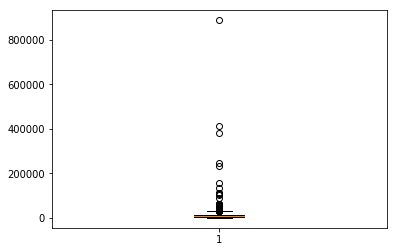

In [13]:
plt.boxplot(d["HKQuantityTypeIdentifierStepCount"])

In [18]:
step_data = d["HKQuantityTypeIdentifierStepCount"]
step_data = step_data[~np.isnan(step_data)]

In [31]:
step_mean = np.mean(step_data)
step_std = np.std(step_data)

In [32]:
outliers = d["HKQuantityTypeIdentifierStepCount"] > step_mean + 3*step_std

In [33]:
outlier_subjects = d[outliers]["Subject"]

In [34]:
print outlier_subjects

['89a190e2-6b78-46b5-b469-27d231bbf123'
 '441a70b9-9b56-48d5-935a-a7a844abbf57'
 'b5eeefec-7f4a-48c5-aef4-0db7030fb532'
 '105de5d8-e264-47cc-8bdc-d4aff7d568bb'
 '6e070717-16ee-4485-8c05-a6f376b5d1bf'
 '54be93b9-8d7b-4640-b592-956891955dde'
 '6bcb2e5c-cfcf-48c5-bc3a-a0ef78fd4c25'
 '92d1c57e-5cce-4738-89d6-a7f67ed9baf7'
 'df3f739a-35a1-48c5-a64b-a010b952ac35'
 'bcfa41b8-8e9f-48f9-81e1-c27831cadecf']
